In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.axisbelow'] = True

In [2]:
import FinanceDataReader as fdr

sp500 = fdr.StockListing('S&P500')
sp500.head(10)

,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment
5,ACN,Accenture,Information Technology,IT Consulting & Other Services
6,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment
7,ADM,ADM,Consumer Staples,Agricultural Products
8,ADBE,Adobe Inc.,Information Technology,Application Software
9,ADP,ADP,Information Technology,Data Processing & Outsourced Services


In [3]:
# 디렉토리가 없으면 생성
import os
folder = "sp500_price/"
if not os.path.isdir(folder):
    os.mkdir(folder)

In [7]:
import csv
import pandas as pd

for ix, row in sp500.iterrows():
    sym, name = row['Symbol'], row['Name']
    csv_fn = folder + '%s.csv' % (sym)
    if os.path.exists(csv_fn):
        print('skip', csv_fn)
        continue

    try:
      print(csv_fn, end=' ')
      df = fdr.DataReader(sym, '2002-01-01', '2022-12-01')
      df['Symbol'] = sym
      print(len(df), 'rows')
      df.to_csv(csv_fn, quoting=csv.QUOTE_MINIMAL)
    except ValueError as e:
      print(e)

skip sp500_price/MMM.csv
skip sp500_price/AOS.csv
skip sp500_price/ABT.csv
skip sp500_price/ABBV.csv
skip sp500_price/ABMD.csv
skip sp500_price/ACN.csv
skip sp500_price/ATVI.csv
skip sp500_price/ADM.csv
skip sp500_price/ADBE.csv
skip sp500_price/ADP.csv
sp500_price/AAP.csv 5266 rows
sp500_price/AES.csv 5266 rows
sp500_price/AFL.csv 5266 rows
sp500_price/A.csv 5266 rows
sp500_price/APD.csv 5266 rows
sp500_price/AKAM.csv 5266 rows
sp500_price/ALK.csv 5266 rows
sp500_price/ALB.csv 5266 rows
sp500_price/ARE.csv 5266 rows
sp500_price/ALGN.csv 5266 rows
sp500_price/ALLE.csv 2275 rows
sp500_price/LNT.csv 5266 rows
sp500_price/ALL.csv 5266 rows
sp500_price/GOOGL.csv 4604 rows
sp500_price/GOOG.csv 4604 rows
sp500_price/MO.csv 5266 rows
sp500_price/AMZN.csv 5266 rows
sp500_price/AMCR.csv 2655 rows
sp500_price/AMD.csv 5266 rows
sp500_price/AEE.csv 5266 rows
sp500_price/AAL.csv 4325 rows
sp500_price/AEP.csv 5266 rows
sp500_price/AXP.csv 5266 rows
sp500_price/AIG.csv 5266 rows
sp500_price/AMT.csv 5

In [8]:
us500 = fdr.DataReader('US500', '2002-01-01', '2022-12-01')
us500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,1148.079956,1154.670044,1136.229980,1154.670044,1154.670044,1171000000
2002-01-03,1154.670044,1165.270020,1154.010010,1165.270020,1165.270020,1398900000
2002-01-04,1165.270020,1176.550049,1163.420044,1172.510010,1172.510010,1513000000
2002-01-07,1172.510010,1176.969971,1163.550049,1164.890015,1164.890015,1308300000
2002-01-08,1164.890015,1167.599976,1157.459961,1160.709961,1160.709961,1258800000


In [ ]:
import numpy as np
import pandas as pd

import os
print(os.listdir("./sp500_price"))

In [29]:
df_20year = []
folder = "sp500_price/"

for ix, row in sp500.iterrows():
    sym, name = row['Symbol'], row['Name']
    csv_fn = folder + '%s.csv' % (sym)
    
    try:
        df = pd.read_csv(csv_fn)
        if (len(df) != 5266):
            df_20year.append(csv_fn)
    except FileNotFoundError as e:
        print(e)

[Errno 2] No such file or directory: 'sp500_price/BFB.csv'


In [31]:
file_path_list = df_20year

for i in df_20year:
    if os.path.exists(i):
        os.remove(i)

In [ ]:
df_price = pd.DataFrame()

folder = "sp500_price/"

for ix, row in sp500.iterrows():
    sym, name = row['Symbol'], row['Name']
    csv_fn = folder + '%s.csv' % (sym)
    
    try:
        df = pd.read_csv(csv_fn, parse_dates=True, index_col='Date')
        df_price[sym] = df['Adj Close']
    except FileNotFoundError as e:
        print(e)

In [76]:
df_price['SP500'] = sp500['Adj Close']

C:\Users\indi\AppData\Local\Temp\ipykernel_18636\2581064664.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pd.concat(df_price, us500['Adj Close'])


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [35]:
acc_returns = (df_price.pct_change() + 1).product() - 1

MNST    1203.209946
AAPL     416.378601
ODFL     261.846118
AMZN     175.167885
ISRG     123.795372
TSCO     122.106363
TYL       72.235041
IDXX      60.012893
BKNG      58.243592
HUM       51.657824
ORLY      48.149516
CNC       46.481828
ROL       45.259965
WST       45.184905
ALGN      44.734885
ANSS      41.242525
CTSH      40.786958
CMI       39.814172
JBHT      38.876119
ILMN      37.769778
dtype: float64

In [42]:
import matplotlib as mpl
import numpy as np

def make_colors(n, colormap=plt.cm.Spectral):
    return colormap(np.linspace(0.1, 1.0, n))

In [72]:
df = pd.DataFrame()
df['S&P500'] = us500.loc[:, 'Adj Close'] # S&P500 지수
#df[best20.keys()] = df_price.loc[:, best20.keys()]
df.pct_change()

,S&P500
Date,
2002-01-02,NaN
2002-01-03,0.009180
2002-01-04,0.006213
2002-01-07,-0.006499
2002-01-08,-0.003588
...,...
2022-11-23,0.005915
2022-11-25,-0.000283
2022-11-28,-0.015444


In [50]:
# 종목간 상관관계
changes = df.pct_change()
corr = changes.corr()
corr.head(10)

,S&P500,MNST,AAPL,ODFL,AMZN,ISRG,TSCO,TYL,IDXX,BKNG,...,ORLY,CNC,ROL,WST,ALGN,ANSS,CTSH,CMI,JBHT,ILMN
S&P500,1.000000,0.360092,0.615239,0.539015,0.539567,0.489691,0.501235,0.504093,0.561165,0.481431,...,0.539119,0.409161,0.591355,0.542036,0.432735,0.625454,0.626209,0.692386,0.603201,0.410007
MNST,0.360092,1.000000,0.246380,0.214194,0.211964,0.208945,0.198659,0.199225,0.216124,0.190962,...,0.225957,0.169157,0.233670,0.212988,0.175636,0.279548,0.264479,0.245201,0.209767,0.169543
AAPL,0.615239,0.246380,1.000000,0.315824,0.423210,0.333883,0.301959,0.326960,0.369311,0.318102,...,0.327751,0.226107,0.362035,0.346028,0.264126,0.429801,0.420615,0.417025,0.352659,0.260171
ODFL,0.539015,0.214194,0.315824,1.000000,0.325963,0.303222,0.373849,0.346606,0.351178,0.281871,...,0.350805,0.252958,0.410597,0.366549,0.304368,0.424816,0.380538,0.441849,0.588451,0.228968
AMZN,0.539567,0.211964,0.423210,0.325963,1.000000,0.303359,0.317215,0.332663,0.356022,0.362416,...,0.305198,0.218412,0.331598,0.323081,0.291708,0.402988,0.365809,0.351608,0.338132,0.239417
ISRG,0.489691,0.208945,0.333883,0.303222,0.303359,1.000000,0.247412,0.280389,0.368435,0.262145,...,0.297138,0.268435,0.331372,0.325844,0.270015,0.365767,0.340468,0.328223,0.305377,0.260337
TSCO,0.501235,0.198659,0.301959,0.373849,0.317215,0.247412,1.000000,0.319474,0.293303,0.248112,...,0.433128,0.234732,0.371560,0.306488,0.231335,0.358774,0.346384,0.359548,0.390038,0.233438
TYL,0.504093,0.199225,0.326960,0.346606,0.332663,0.280389,0.319474,1.000000,0.364460,0.260856,...,0.305048,0.243625,0.384580,0.377555,0.267405,0.399640,0.365776,0.335250,0.335587,0.278536
IDXX,0.561165,0.216124,0.369311,0.351178,0.356022,0.368435,0.293303,0.364460,1.000000,0.279759,...,0.314641,0.289896,0.392263,0.412848,0.319095,0.433355,0.362931,0.362209,0.333370,0.300393
BKNG,0.481431,0.190962,0.318102,0.281871,0.362416,0.262145,0.248112,0.260856,0.279759,1.000000,...,0.282549,0.198969,0.264096,0.235610,0.244568,0.337174,0.349936,0.380535,0.311942,0.217804


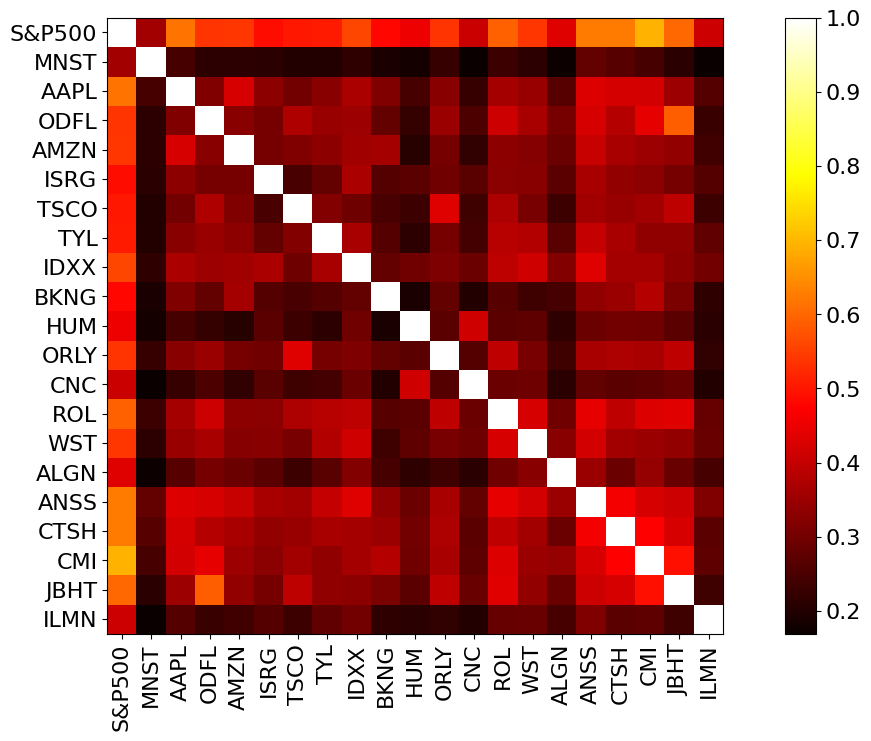

In [51]:
# 상관관계 히트맵

plt.figure(figsize=(16,8))
plt.grid(False)
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

In [52]:
# 상관계수 순위 만들기 (수익률 상위 20종목)
import pandas as pd

idx, vals = [], []
for ix, i in enumerate(corr.columns.values):
    for j in corr.columns.values[ix + 1:]:
        idx.append((i, j))
        vals.append(corr[i][j])

ser = pd.Series(data=vals, index=idx)
ser_ord = ser.sort_values(ascending=False)
ser_ord[:20]

(S&P500, CMI)     0.692386
(S&P500, CTSH)    0.626209
(S&P500, ANSS)    0.625454
(S&P500, AAPL)    0.615239
(S&P500, JBHT)    0.603201
(S&P500, ROL)     0.591355
(ODFL, JBHT)      0.588451
(S&P500, IDXX)    0.561165
(S&P500, WST)     0.542036
(S&P500, AMZN)    0.539567
(S&P500, ORLY)    0.539119
(S&P500, ODFL)    0.539015
(S&P500, TYL)     0.504093
(S&P500, TSCO)    0.501235
(CMI, JBHT)       0.490549
(S&P500, ISRG)    0.489691
(S&P500, BKNG)    0.481431
(CTSH, CMI)       0.473578
(ANSS, CTSH)      0.459131
(S&P500, HUM)     0.452637
dtype: float64

In [53]:
# 지수와 상관관계
changes = df.pct_change()
corr = changes.corr()
corr['S&P500'].sort_values(ascending=False)[1:]

CMI     0.692386
CTSH    0.626209
ANSS    0.625454
AAPL    0.615239
JBHT    0.603201
ROL     0.591355
IDXX    0.561165
WST     0.542036
AMZN    0.539567
ORLY    0.539119
ODFL    0.539015
TYL     0.504093
TSCO    0.501235
ISRG    0.489691
BKNG    0.481431
HUM     0.452637
ALGN    0.432735
ILMN    0.410007
CNC     0.409161
MNST    0.360092
Name: S&P500, dtype: float64

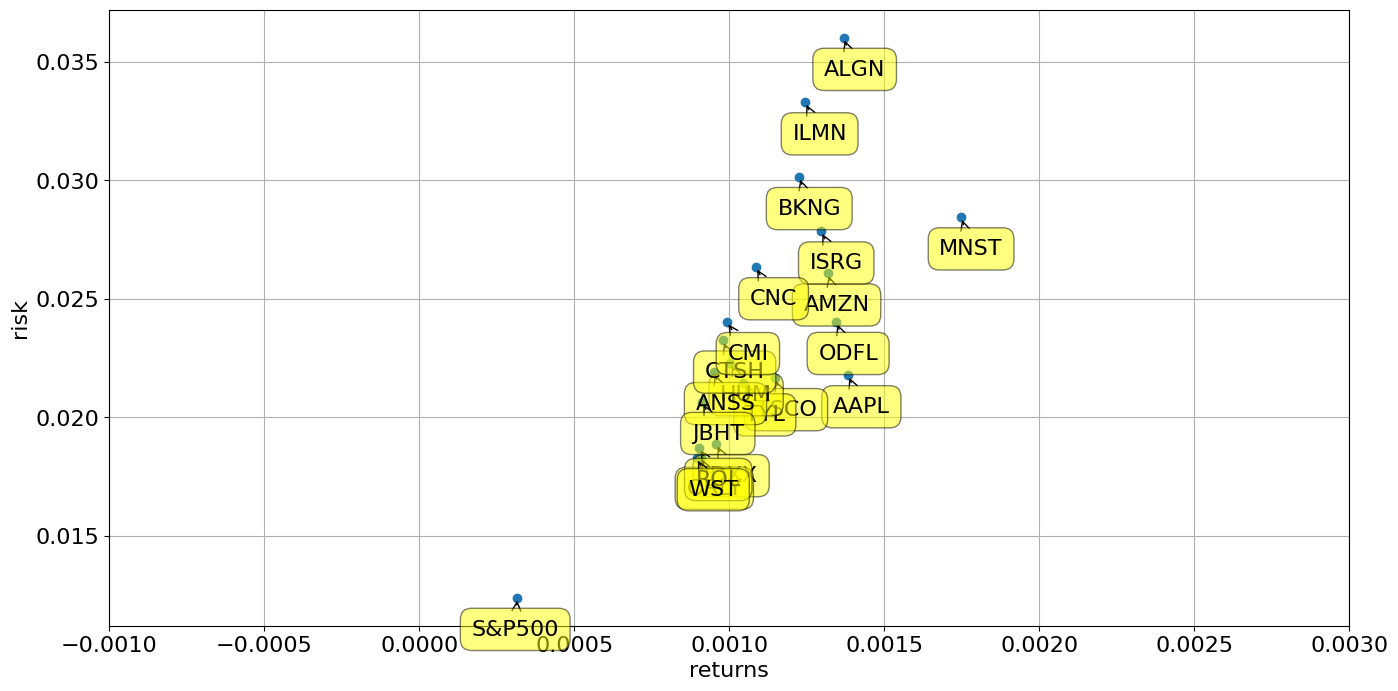

In [54]:
plt.figure(figsize=(16,8))
plt.scatter(changes.mean(), changes.std())
plt.xlabel('returns')
plt.ylabel('risk')
plt.xlim(-0.001, 0.003)
for label, x, y in zip(changes.columns, changes.mean(), changes.std()):
    plt.annotate( label, xy=(x, y), xytext=(30, -30),
    textcoords = 'offset points',
    ha = 'right', va = 'bottom',
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))   

In [ ]:
df = pd.DataFrame()

df['S&P500'] = us500.loc['2022', 'Adj Close'] # S&P500 지수
df[df_price.columns] = df_price.loc['2022', df_price.columns]

# 종목간 상관관계
changes = df.pct_change()
corr = changes.corr()

idx, vals = [], []
for ix, i in enumerate(corr.columns.values):
    for j in corr.columns.values[ix + 1:]:
        idx.append((i, j))
        vals.append(corr[i][j])

ser = pd.Series(data=vals, index=idx)
ser_ord = ser.sort_values(ascending=False)
ser_ord[:40]

<AxesSubplot: xlabel='Date'>

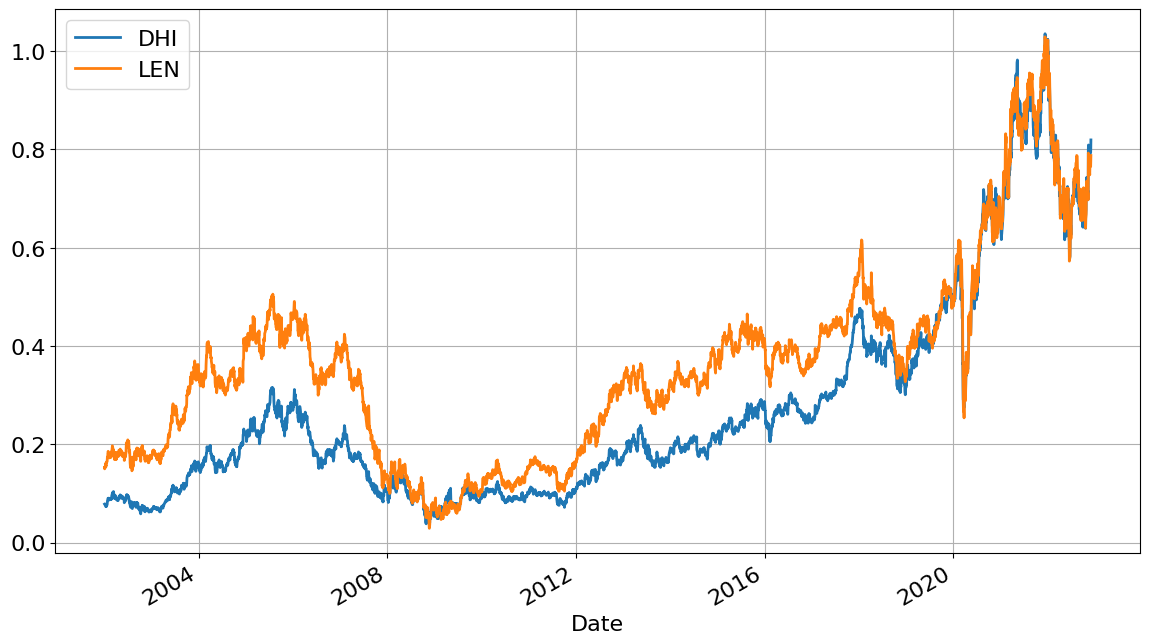

In [58]:
#df_price[['DHI', 'LEN']].plot()
df_plot = df_price[['DHI', 'LEN']]
df_plot = df_plot / (df_plot.max() - df_plot.min())
df_plot.plot()

<AxesSubplot: xlabel='Date'>

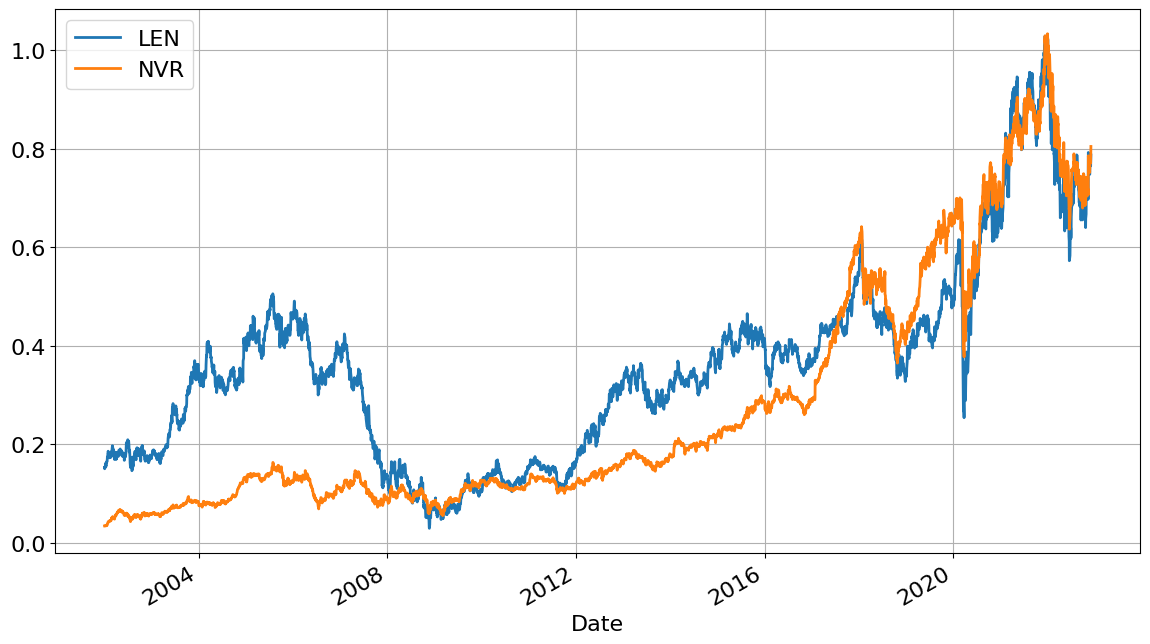

In [62]:
#df_price[['LEN', 'NVR']].plot()
df_plot = df_price[['LEN', 'NVR']]
df_plot = df_plot / (df_plot.max() - df_plot.min())
df_plot.plot()